# Import the necessary libraries and store the data in our system for analysis.

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import json
import plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LinearRegression
import urllib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import re

from collections import Counter
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)





data= pd.read_csv("USvideos.csv")
data.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


Split hour from publish_time

In [58]:

data['publish_time'] = pd.to_datetime(data['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
data['time'] = data['publish_time'].dt.time
data['hour'] = data['time'].map(lambda x: x.hour)
data.hour


0        17
1         7
2        19
3        11
4        18
         ..
40944    13
40945     1
40946    17
40947    17
40948    17
Name: hour, Length: 40949, dtype: int64

Count of views in timeline

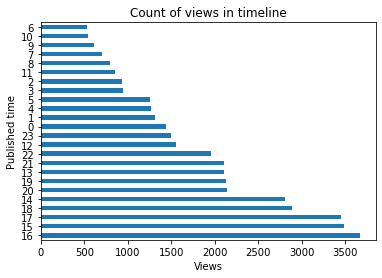

In [59]:
data.hour.value_counts().plot.barh()
plt.xlabel('Views')
plt.ylabel('Published time')
plt.title('Count of views in timeline')
plt.show()

In [60]:
columns = ['views', 'likes' , 'dislikes' , 'comment_count']
for col in columns:
    data[col] = data[col].astype(int)
data['category_id'] = data['category_id'].astype(str)

All categories

In [111]:
id_to_category = {}

with open('US_category_id.json' , 'r') as f:
    json = json.load(f)
    for category in json['items']:
        id_to_category[category['id']] = category['snippet']['title']
id_to_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

Maping category with category_id

In [62]:
data['category'] = data['category_id'].map(id_to_category)
data.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,time,hour,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,17:13:01,17,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",07:30:00,7,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,19:05:24,19,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,11:00:04,11,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,18:01:41,18,Entertainment
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13 19:07:23,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,19:07:23,19,Science & Technology
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12 05:37:17,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,05:37:17,5,Entertainment
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12 21:50:37,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....,21:50:37,21,Science & Technology
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13 14:00:23,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",14:00:23,14,Film & Animation
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13 13:45:16,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo...",13:45:16,13,News & Politics


# Visualization of USA dataset

In [63]:
def view_bar(x,y,title):
    plt.figure(figsize = (10,5))
    sns.barplot(x = x, y = y)
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.show()

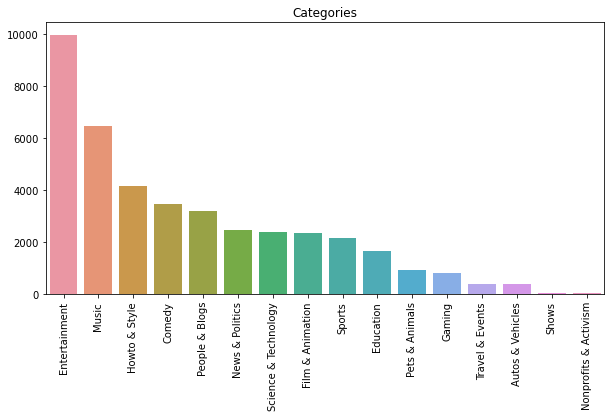

In [64]:
x = data.category.value_counts().index
y = data.category.value_counts().values
title = "Categories"
view_bar(x,y,title)

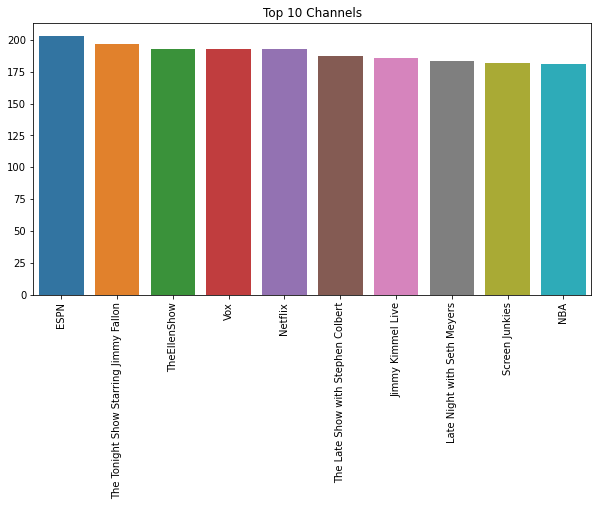

In [65]:
x = data.channel_title.value_counts().head(10).index
y = data.channel_title.value_counts().head(10).values
title = "Top 10 Channels"
view_bar(x,y,title)

In [ ]:
sort_by_views = data.sort_values(by ="views" , ascending = False).drop_duplicates('title', keep = 'first')

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48169 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53444 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49548 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45380 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45800 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 48169 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 53444 missing from current font.

/opt/anaconda3/lib/p

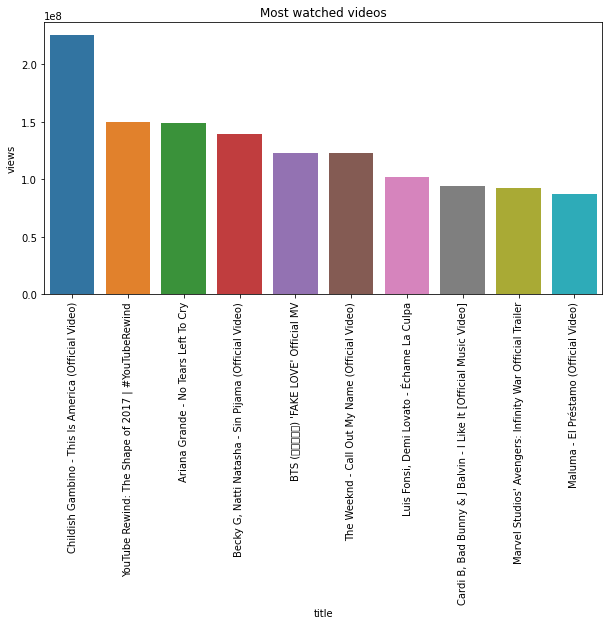

In [66]:
x = sort_by_views['title'].head(10)
y = sort_by_views['views'].head(10)
title = "Most watched videos"
view_bar(x,y,title)

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 36681 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48177 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51068 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47805 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 36681 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 48177 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51068 missing from current font.

/opt/anaconda3/lib/p

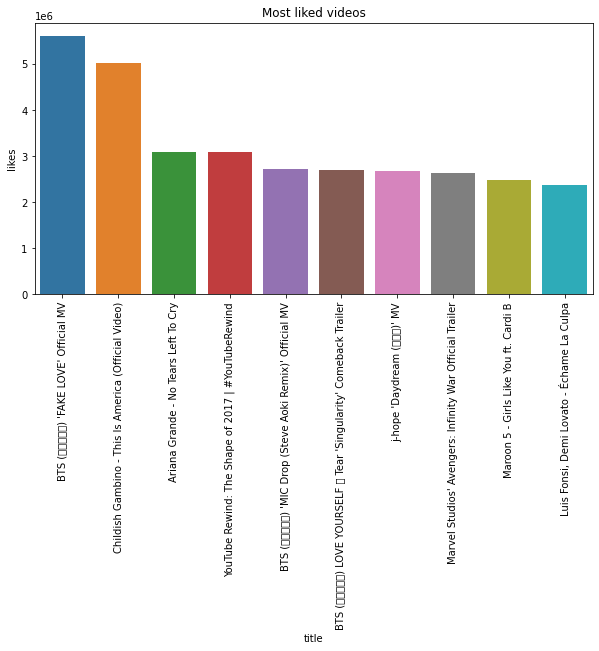

In [67]:
sort_by_likes = data.sort_values(by ="likes" , ascending = False).drop_duplicates('title', keep = 'first')
x = sort_by_likes['title'].head(10)
y = sort_by_likes['likes'].head(10)
title = "Most liked videos"
view_bar(x,y,title)

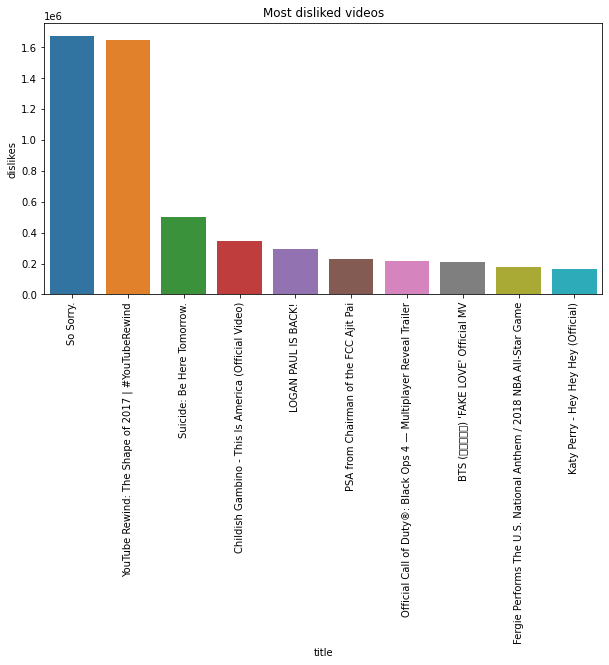

In [68]:
sort_by_dislikes = data.sort_values(by ="dislikes" , ascending = False).drop_duplicates('title', keep = 'first')
x = sort_by_dislikes['title'].head(10)
y = sort_by_dislikes['dislikes'].head(10)
title = "Most disliked videos"
view_bar(x,y,title)

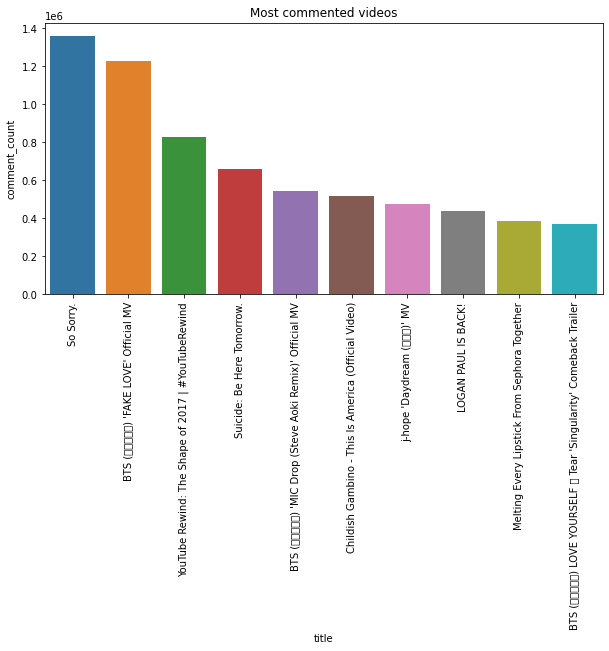

In [69]:
sort_by_comment = data.sort_values(by ="comment_count" , ascending = False).drop_duplicates('title', keep = 'first')
x = sort_by_comment['title'].head(10)
y = sort_by_comment['comment_count'].head(10)
title = "Most commented videos"
view_bar(x,y,title)

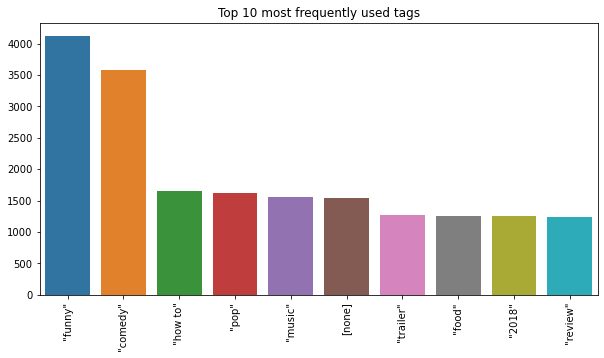

In [70]:
tags = data['tags'].map(lambda x : x.lower().split('|')).values
all_tags = [tag for t in tags for tag in t]
tags1 = pd.DataFrame({'tags' : all_tags})
x = tags1['tags'].value_counts().index[0:10]
y = tags1['tags'].value_counts().values[0:10]
title = "Top 10 most frequently used tags"
view_bar(x,y,title)

In [71]:
def most_used_tags(data,title,i=0,j=10):
    tags = data['tags'].map(lambda x : x.lower().split('|')).values
    all_tags = [tag for t in tags for tag in t]
    tags1 = pd.DataFrame({'tags' : all_tags})
    x = tags1['tags'].value_counts().index[i:j]
    y = tags1['tags'].value_counts().values[i:j]
    title = "Top 20 most frequently used tags - " + title
    view_bar(x,y,title)

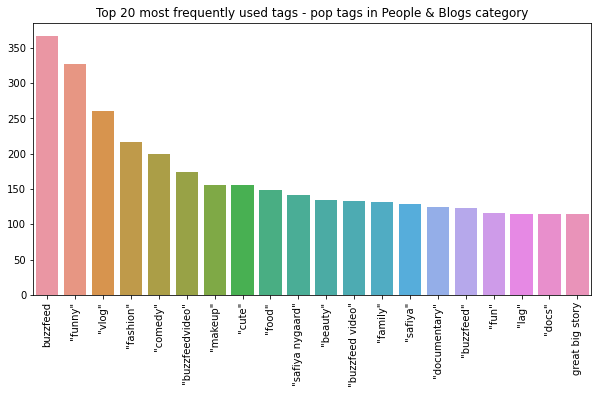

In [72]:
pop_tag = data[data['category'] == 'People & Blogs']
pop_tag
data['category']
most_used_tags(pop_tag,'pop tags in People & Blogs category',1,21)

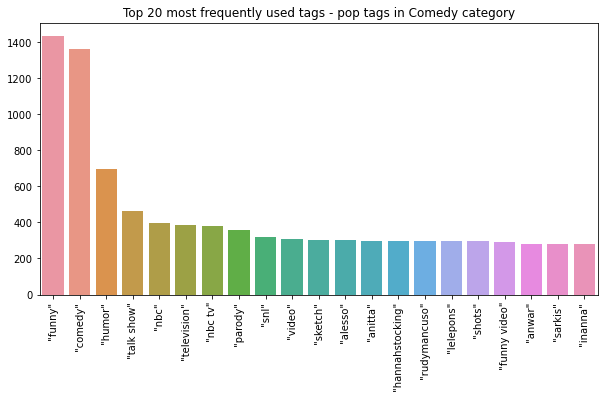

In [73]:
pop_tag = data[data['category'] == 'Comedy']
most_used_tags(pop_tag,'pop tags in Comedy category',0,21)

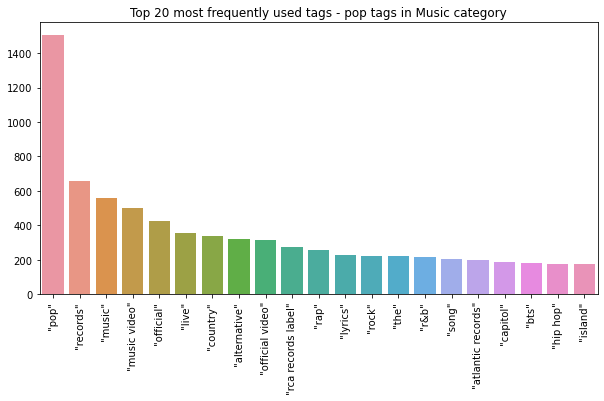

In [74]:
pop_tag = data[data['category'] == 'Music']
most_used_tags(pop_tag,'pop tags in Music category',0,21)

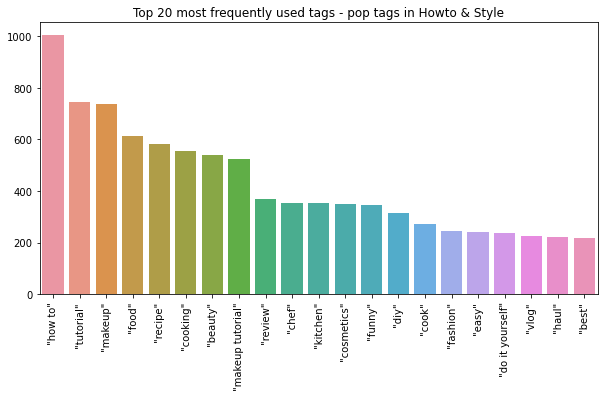

In [75]:
pop_tag = data[data['category'] == 'Howto & Style']
most_used_tags(pop_tag,'pop tags in Howto & Style',0,21)

# Analyzing all datasets:Russia,Canada,Germany,France,Indiajapan,South Korea,Mexico,USA

In [76]:
ru_data = pd.read_csv('RUvideos.csv')
ca_data = pd.read_csv('CAvideos.csv')
de_data = pd.read_csv('DEvideos.csv')
fr_data = pd.read_csv('FRvideos.csv')
in_data = pd.read_csv('INvideos.csv')
jp_data = pd.read_csv('JPvideos.csv')
kr_data = pd.read_csv('KRvideos.csv')
mx_data = pd.read_csv('MXvideos.csv')
us_data = pd.read_csv('USvideos.csv')

all_data = [ru_data, ca_data,de_data, fr_data, in_data, jp_data, kr_data, mx_data, us_data]
countries = ['Russia','Canada','Germany','France','India','Japan','South Korea','Mexico','USA']

In [77]:
def insert_category(dataframe):
    with open('US_category_id.json', 'r') as categories:
        category_dict = json.load(categories)
    cat = {}  
    
    for i in category_dict['items']:
        cat[i['id']] = i['snippet']['title']
            
    new_cat = []
        
    for i in dataframe['category_id']:
        new_cat.append(cat[str(i)])
        
    
    dataframe.insert(4,'category_name',new_cat)

In [78]:
def format_date(dataframe):
    dataframe['trending_date'] = pd.to_datetime(dataframe['trending_date'], format='%y.%d.%m')
    dataframe['publish_time'] = pd.to_datetime(dataframe['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [79]:
for i in all_data:
    insert_category(i)
    format_date(i)

In [80]:
def view_bar(x,y,title=''):
    plt.figure(figsize = (8,3))
    sns.barplot(x = x, y = y)
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.show()

In [81]:
def most_used_tags(df,title,i=0,j=10):
    tags = df['tags'].map(lambda x : x.lower().split('|')).values
    all_tags = [tag for t in tags for tag in t]
    tags1 = pd.DataFrame({'tags' : all_tags})
    x = tags1['tags'].value_counts().index[i:j]
    y = tags1['tags'].value_counts().values[i:j]
    title = "Top 10 most frequently used tags - " + title
    view_bar(x,y,title)

In [82]:
def most_used_categories(df, title):
    tags = df['category_name'].map(lambda x : x.lower().split('|')).values
    all_tags = [tag for t in tags for tag in t]
    tags1 = pd.DataFrame({'category_name' : all_tags})
    x = tags1['category_name'].value_counts().index[0:10]
    y = tags1['category_name'].value_counts().values[0:10]
    title = "Top 10 most frequently used categories - " + title
    view_bar(x,y,title)

In [83]:
us_data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_name',
       'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description'],
      dtype='object')

In [84]:
us_data.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


In [85]:
ru_data.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_name                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
dtype: object

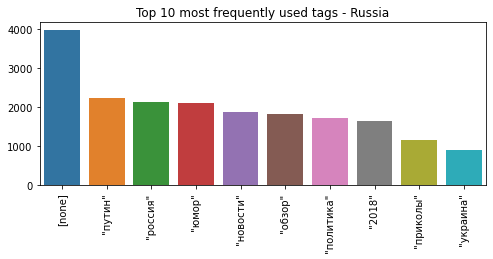

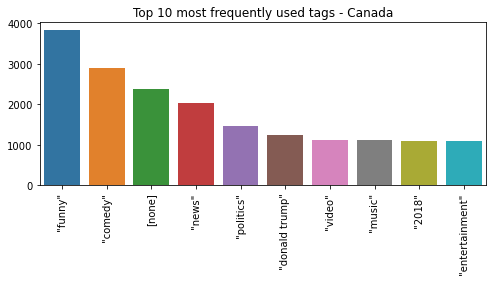

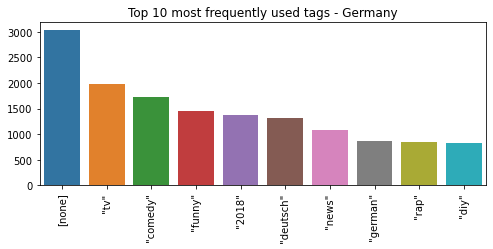

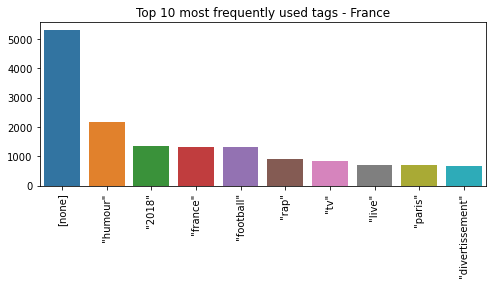

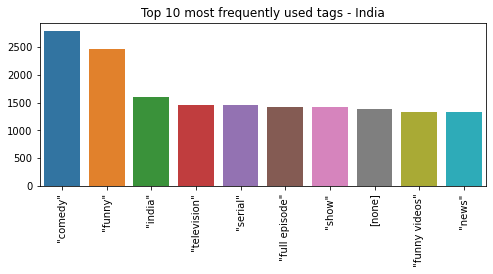

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 26009 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 29702 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12362 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12418 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12375 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12429 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12491 missing from current font.

/opt/anaconda3/lib/p

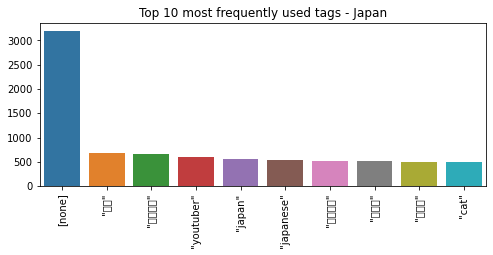

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47673 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48169 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47928 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51116 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51064 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45684 missing from current font.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49828 missing from current font.

/opt/anaconda3/lib/p

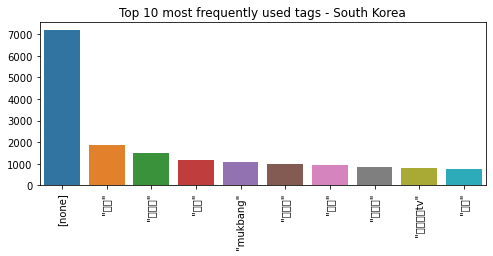

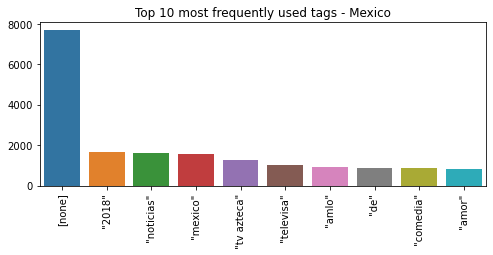

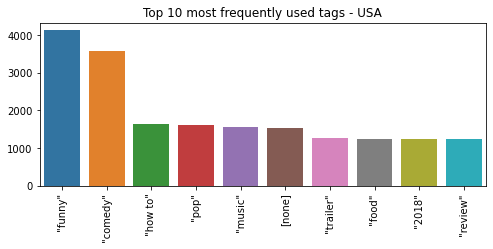

In [86]:
for i in range(len(all_data)):
    most_used_tags(all_data[i],countries[i])

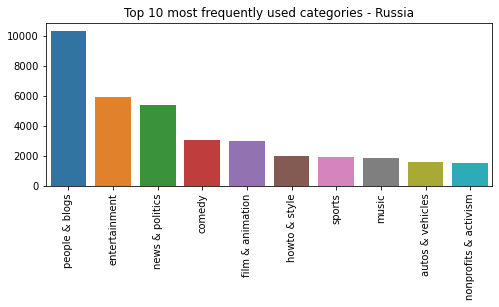

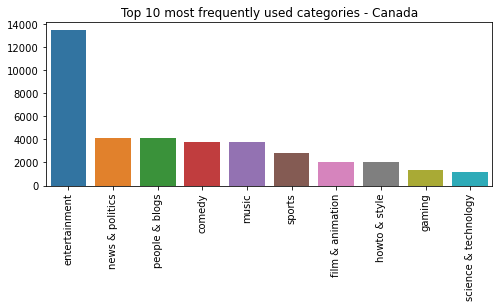

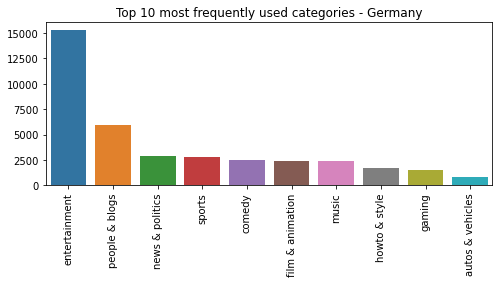

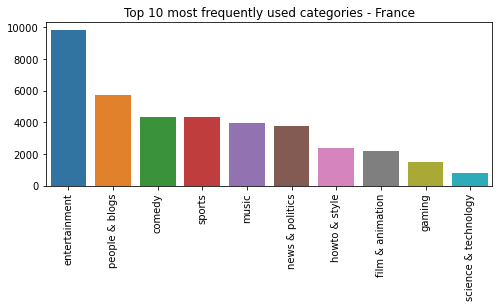

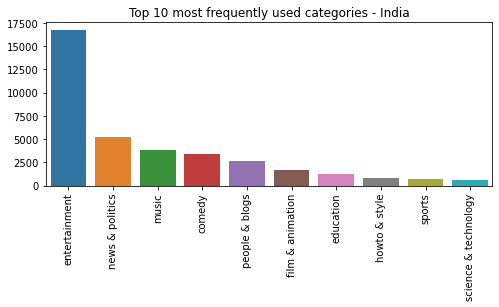

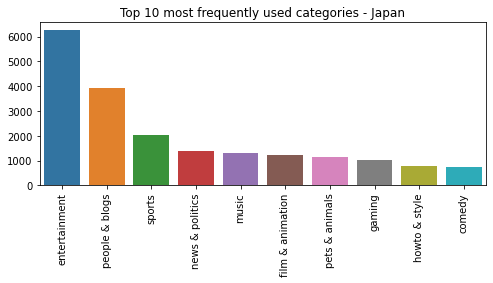

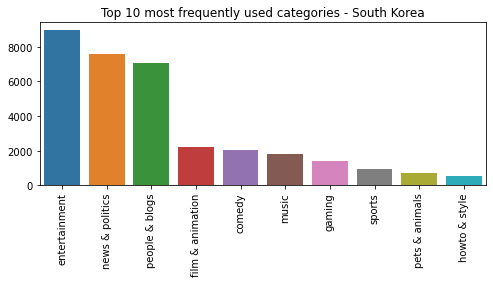

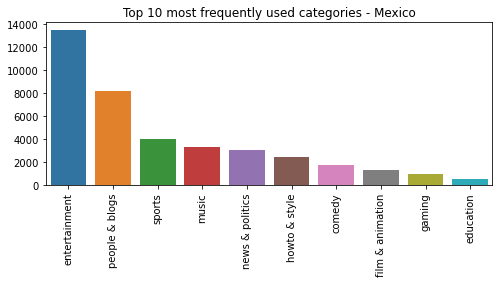

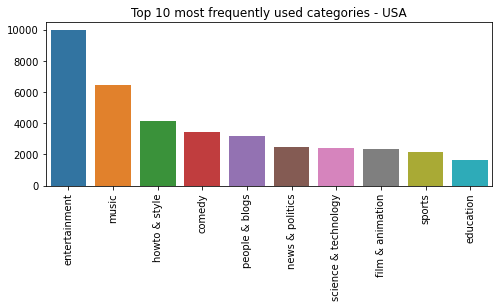

In [87]:
for i in range(len(all_data)):
    most_used_categories(all_data[i],countries[i])

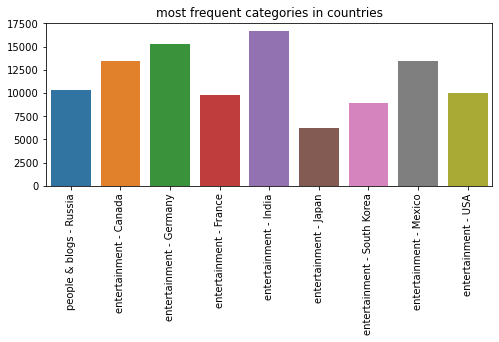

In [88]:
categories_by_country = dict()
i = 0
for df in all_data:
    tags = df['category_name'].map(lambda x : x.lower().split('|')).values
    all_tags = [tag for t in tags for tag in t]
    tags1 = pd.DataFrame({'category_name' : all_tags})
    x = tags1['category_name'].value_counts().index[0]
    y = tags1['category_name'].value_counts().values[0]
    categories_by_country[str(x)+ ' - ' + countries[i]] = y
    i+=1

view_bar(list(categories_by_country.keys()),list(categories_by_country.values()),'most frequent categories in countries')

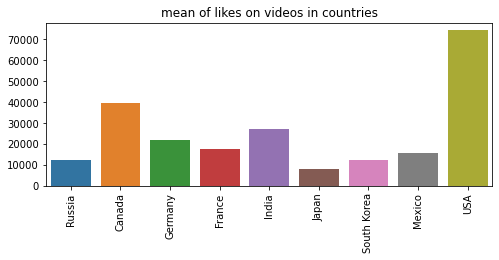

In [89]:
likes_by_country = []
for i in all_data:
    likes_by_country.append(int(i['likes'].mean()))
view_bar(countries,likes_by_country,'mean of likes on videos in countries')

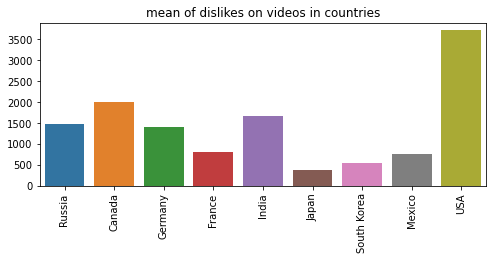

In [90]:
dislikes_by_country = []
for i in all_data:
    dislikes_by_country.append(int(i['dislikes'].mean()))
dislikes_by_country
view_bar(countries,dislikes_by_country,'mean of dislikes on videos in countries')

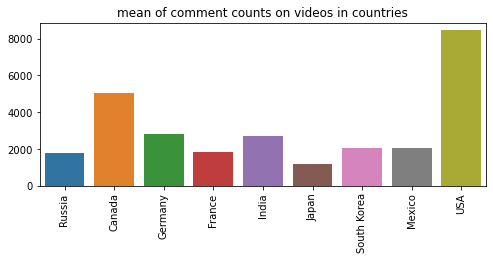

In [91]:
comments_by_country = []
for i in all_data:
    comments_by_country.append(int(i['comment_count'].mean()))
view_bar(countries,comments_by_country,'mean of comment counts on videos in countries')

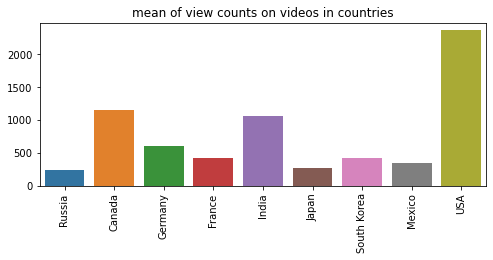

In [92]:
views_by_country = []
for i in all_data:
    q = i['views']/1000
    views_by_country.append(int(q.mean()))
view_bar(countries,views_by_country,'mean of view counts on videos in countries')

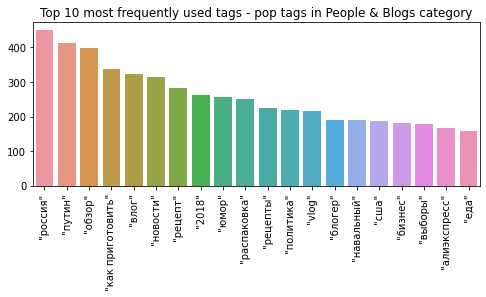

In [95]:
pop_tag = ru_data[ru_data['category_name'] == 'People & Blogs']
pop_tag
ru_data['category_name']
most_used_tags(pop_tag,'pop tags in People & Blogs category',1,21)

Regression

In [103]:
#convert string data to numeric
le = preprocessing.LabelEncoder()

In [104]:
#create model based on title, tags and category to predict views
y = ru_data['views']
le.fit(ru_data['title'])
x_transformed = le.transform(ru_data['title'])
le.fit(ru_data['tags'])
x_transformed2 = le.transform(ru_data['tags'])
le.fit(ru_data['category_name'])
x_transformed3 = le.transform(ru_data['category_name'])
X = np.array([x_transformed,x_transformed2,x_transformed3])
X = X.transpose()

In [105]:
X

array([[13570, 17043,    11],
       [ 8151, 14704,    11],
       [31037, 26339,     3],
       ...,
       [ 6020,  2841,     3],
       [20768, 22738,    11],
       [23412, 21334,    10]])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [107]:
linreg.score(X_train, y_train)
#score is too bad
#model is not fit for our project

0.013923531999015415

In [108]:
linreg.predict(X_test).mean()

241291.66301557116

In [109]:
ru_data['views'].mean()

240739.90159345922

# In linear Regression we take bad score,and we decided to use another model

In [2]:
ru_data = pd.read_csv('RUvideos.csv')
ca_data = pd.read_csv('CAvideos.csv')
de_data = pd.read_csv('DEvideos.csv')
fr_data = pd.read_csv('FRvideos.csv')
in_data = pd.read_csv('INvideos.csv')
jp_data = pd.read_csv('JPvideos.csv')
kr_data = pd.read_csv('KRvideos.csv')
mx_data = pd.read_csv('MXvideos.csv')
data = pd.read_csv('USvideos.csv')

all_data = [ru_data, ca_data,de_data, fr_data, in_data, jp_data, kr_data, mx_data, data]
countries = ['Russia','Canada','Germany','France','India','Japan','South Korea','Mexico','USA']

# Create new column with title of videos

In [3]:
def insert_category(dataframe):
    with open('data/US_category_id.json', 'r') as categories:
        category_dict = json.load(categories)
    cat = {}  
    
    for i in category_dict['items']:
        cat[i['id']] = i['snippet']['title']
            
    new_cat = []
        
    for i in dataframe['category_id']:
        new_cat.append(cat[str(i)])
        
    
    dataframe.insert(4,'category_name',new_cat)

In [4]:
insert_category(data)

# change str time to dataTime format

In [5]:
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
data['publish_time'] = pd.to_datetime(data['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [6]:
data[data['channel_title']=='CaseyNeistat']

,video_id,trending_date,title,channel_title,category_name,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
217,2kyS6SvSYSE,2017-11-15,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13 17:13:01,SHANtell martin,2188590,88099,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
448,2kyS6SvSYSE,2017-11-16,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13 17:13:01,SHANtell martin,2325233,91111,7543,21450,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
689,2kyS6SvSYSE,2017-11-17,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13 17:13:01,SHANtell martin,2400741,92831,7687,21714,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
924,2kyS6SvSYSE,2017-11-18,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13 17:13:01,SHANtell martin,2468267,94303,7802,21866,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1159,2kyS6SvSYSE,2017-11-19,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13 17:13:01,SHANtell martin,2524854,95587,7892,22038,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1383,2kyS6SvSYSE,2017-11-20,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13 17:13:01,SHANtell martin,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
3421,nMbUA7dghlk,2017-12-01,IS THIS THE CAMERA OF THE FUTURE?,CaseyNeistat,People & Blogs,22,2017-11-29 17:59:50,"rylo camera|""360 camera""|""hyperlapse""|""gopro f...",1355237,52745,862,4155,https://i.ytimg.com/vi/nMbUA7dghlk/default.jpg,False,False,False,RYLO Camera (this is not an endorsement or sug...
3661,nMbUA7dghlk,2017-12-02,IS THIS THE CAMERA OF THE FUTURE?,CaseyNeistat,People & Blogs,22,2017-11-29 17:59:50,"rylo camera|""360 camera""|""hyperlapse""|""gopro f...",1473385,55130,974,4277,https://i.ytimg.com/vi/nMbUA7dghlk/default.jpg,False,False,False,RYLO Camera (this is not an endorsement or sug...
3877,nMbUA7dghlk,2017-12-03,IS THIS THE CAMERA OF THE FUTURE?,CaseyNeistat,People & Blogs,22,2017-11-29 17:59:50,"rylo camera|""360 camera""|""hyperlapse""|""gopro f...",1548688,56721,1008,3672,https://i.ytimg.com/vi/nMbUA7dghlk/default.jpg,False,False,False,RYLO Camera (this is not an endorsement or sug...


In [7]:
data.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_name               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [8]:
data[data["description"].apply(lambda x: pd.isna(x))].head(2)# rows with 'Nan' in descriptions

,video_id,trending_date,title,channel_title,category_name,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,2017-11-14,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,Sports,17,2017-11-13 15:11:00,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,2017-11-14,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,Sports,17,2017-11-10 18:23:05,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN


In [9]:
data['description']=data['description'].fillna('')#fill 'Nan'

In [10]:
data.title[0]
    

'WE WANT TO TALK ABOUT OUR MARRIAGE'

In [11]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [12]:
data.groupby('category_id').describe()

views                                                  \
              count          mean           std      min        25%   
category_id                                                           
1            2345.0  3.106250e+06  5.576255e+06    943.0  302850.00   
2             384.0  1.355965e+06  3.373464e+06   2860.0  104652.75   
10           6472.0  6.201003e+06  1.545988e+07   1591.0  382714.75   
15            920.0  8.311435e+05  1.102091e+06   3393.0  185072.25   
17           2174.0  2.025969e+06  4.017255e+06    658.0  194181.50   
19            402.0  8.546196e+05  1.918995e+06    789.0  221528.50   
20            817.0  2.620831e+06  3.165318e+06   1237.0  530676.00   
22           3210.0  1.531835e+06  3.459637e+06    884.0  202658.50   
23           3457.0  1.480308e+06  2.009899e+06   1807.0  351261.00   
24           9964.0  2.067883e+06  5.815996e+06    798.0  273394.75   
25           2487.0  5.925877e+05  1.118918e+06    549.0   50855.00   
26           4146.0  9.837301e+05  1.928995e+06   1107.0  215422.25   
27           1656.0  7.129408e+05  8.792676e+05    773.0  249115.25   
28           2401.0  1.452627e+06  3.445705e+06    983.0  239189.00   
29             57.0  2.963884e+06  7.131112e+06   1456.0   11453.00   
43             57.0  9.035273e+05  5.108668e+05  36609.0  178191.00   

                                                  likes                 ...  \
                   50%         75%          max   count           mean  ...   
category_id                                                             ...   
1            1274578.0  3227166.00   54863912.0  2345.0   70787.836247  ...   
2             406278.0  1074284.25   25244097.0   384.0   11056.395833  ...   
10           1434128.0  4947952.75  225211923.0  6472.0  218918.199011  ...   
15            444501.5   941298.75    6187457.0   920.0   21055.110870  ...   
17            559352.0  1406208.50   29090799.0  2174.0   45363.942502  ...   
19            494825.5   985693.25   23932421.0   402.0   12030.462687  ...   
20           1494142.0  3202761.00   16935442.0   817.0   84502.183599  ...   
22            599139.0  1686941.50   56111957.0  3210.0   58135.825234  ...   
23            980236.0  1877801.00   29178096.0  3457.0   62582.223315  ...   
24            734704.0  1733746.25  149376127.0  9964.0   53243.325070  ...   
25            244014.0   685282.00   10277358.0  2487.0    7298.364696  ...   
26            502783.0  1098035.75   54155921.0  4146.0   39286.076942  ...   
27            419440.5   772115.00    7349435.0  1656.0   29745.031401  ...   
28            585748.0  1375783.00   42799458.0  2401.0   34374.276551  ...   
29             73649.0   316467.00   24286474.0    57.0  259923.614035  ...   
43           1155692.0  1309964.00    1445949.0    57.0   18993.666667  ...   

            dislikes            comment_count                               \
                 75%        max         count          mean            std   
category_id                                                                  
1            3218.00    38082.0        2345.0   7627.744136   11823.266671   
2             796.50    12290.0         384.0   2042.830729    2615.783749   
10           4921.00   343541.0        6472.0  19359.764524   68325.307625   
15            676.75     4899.0         920.0   2892.070652    4841.653462   
17           1224.75   176903.0        2174.0   5148.185373   12090.679801   
19            791.50     9000.0         402.0   2267.440299    2453.861934   
20           5600.00   212976.0         817.0  18042.488372   27124.546683   
22           1838.00   228426.0        3210.0   7719.013084   27727.130910   
23           2291.00    29865.0        3457.0   6521.718831   10423.275894   
24           1820.25  1674420.0        9964.0   7383.229426   41913.978685   
25            935.00   132439.0        2487.0   2428.400885    4916.623094   
26           1292.50    66632.0        4146.0   5583.586589   15848.02

In [13]:
data['title_length']=data['title'].apply(len)# length of title in 'chars'

In [14]:
data

,video_id,trending_date,title,channel_title,category_name,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,34
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",62
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,53
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,32
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24
5,gHZ1Qz0KiKM,2017-11-14,2 Weeks with iPhone X,iJustine,Science & Technology,28,2017-11-13 19:07:23,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,21
6,39idVpFF7NQ,2017-11-14,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,Entertainment,24,2017-11-12 05:37:17,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,41
7,nc99ccSXST0,2017-11-14,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,Science & Technology,28,2017-11-12 21:50:37,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....,35
8,jr9QtXwC9vc,2017-11-14,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,Film & Animation,1,2017-11-13 14:00:23,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",65
9,TUmyygCMMGA,2017-11-14,Why the rise of the robots won’t mean the end ...,Vox,News & Politics,25,2017-11-13 13:45:16,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo...",53


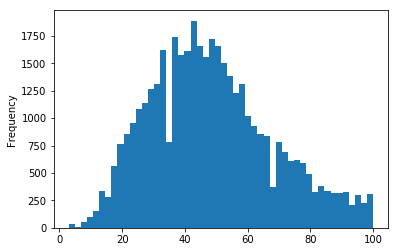

In [15]:
data['title_length'].plot(bins=50, kind='hist') # histogram of length

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0266A20B8>,
      dtype=object)

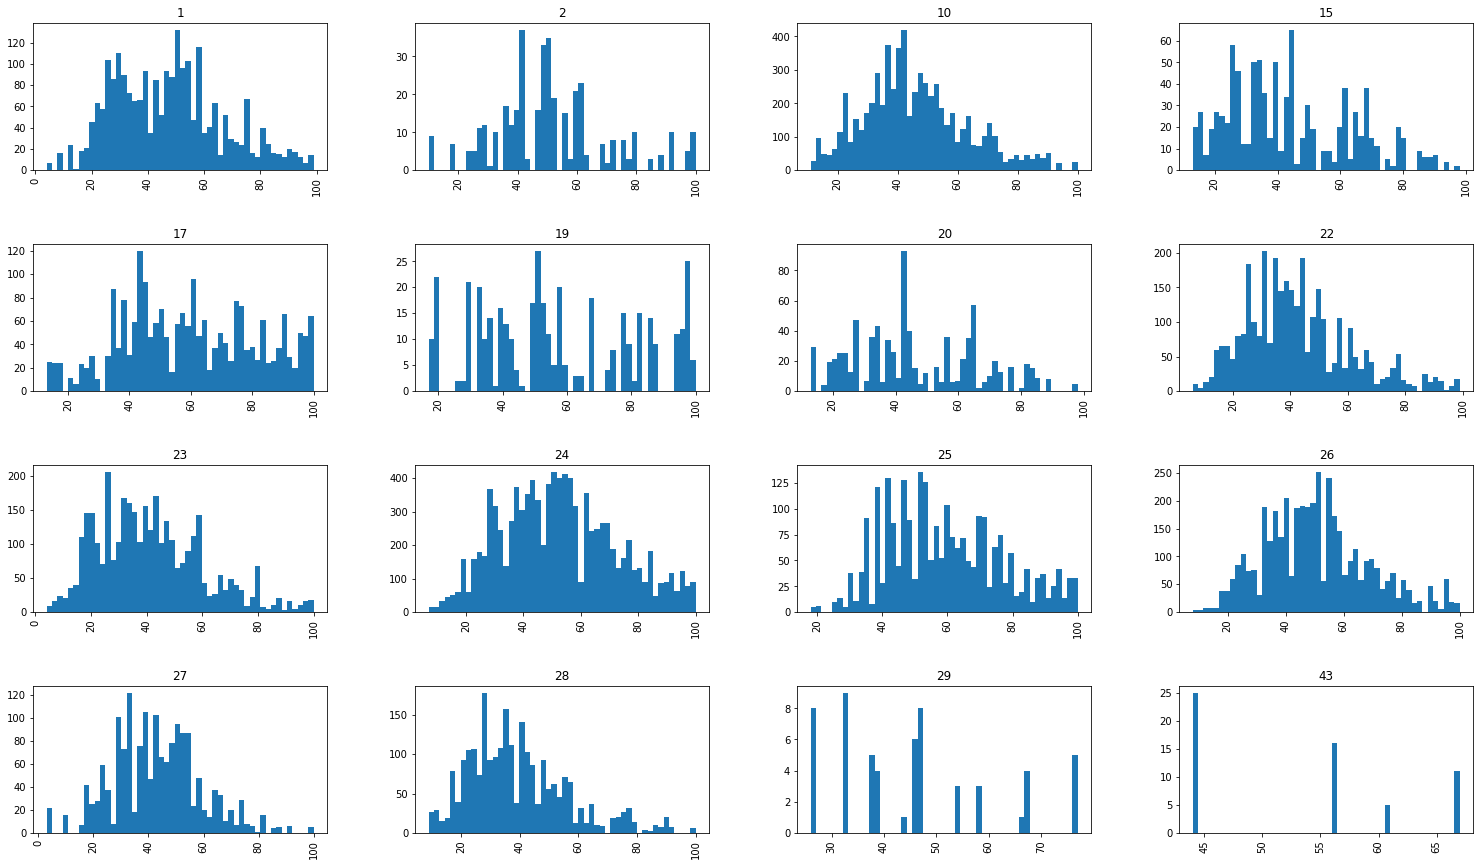

In [16]:
data.hist(column='title_length', by='category_id', bins=50,figsize=(25,15))

In [17]:
data.groupby('category_id').mean().title_length.mean()

48.66498898752071

In [138]:
data.groupby('category_id').median().title_length.median()

46.5

# Stopwords

In [18]:
import string
from nltk.corpus import stopwords

In [19]:
a=string.punctuation

In [20]:
a+='®'#add this symbol

In [21]:
a+='—'#add this symbol

In [22]:
a

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~®—'

In [23]:
def text_process(txt):
    str_i=[smt for smt in txt if smt not in a]#remove punctuation
    str_i=''.join(str_i)
    return [smth for smth in str_i.split() if smth.lower() not in stopwords.words('english')]#remove rewords

In [24]:
data['new_title']=data['title'].apply(text_process)

In [25]:
data['new_title'].head(5)

0                               [WANT, TALK, MARRIAGE]
1    [Trump, Presidency, Last, Week, Tonight, John,...
2    [Racist, Superman, Rudy, Mancuso, King, Bach, ...
3                     [Nickelback, Lyrics, Real, Fake]
4                                  [Dare, GOING, BALD]
Name: new_title, dtype: object

# Most Frequently Used Words

In [26]:
title_words = list(data["new_title"])
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)


[('Official', 3750),
 ('Video', 2557),
 ('2018', 2238),
 ('Trailer', 1924),
 ('ft', 1260),
 ('2', 909),
 ('2017', 884),
 ('Audio', 826),
 ('HD', 796),
 ('Music', 742),
 ('vs', 733),
 ('New', 613),
 ('Live', 609),
 ('10', 560),
 ('Lyric', 554),
 ('Day', 547),
 ('1', 546),
 ('First', 522),
 ('Game', 514),
 ('5', 513),
 ('Black', 503),
 ('Show', 502),
 ('Movie', 475),
 ('MAKEUP', 465),
 ('Star', 464)]

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# CountVectorizer

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
data['clean_joined_title'] = data['new_title'].apply(lambda x: " ".join(x))#joinig words, list to string

In [32]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(data['clean_joined_title'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

13591


In [33]:
messages_bow = bow_transformer.transform(data['clean_joined_title'])

In [34]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (40949, 13591)
Amount of Non-Zero occurences:  249629


In [50]:
print(bow_transformer.get_feature_names()[3333])

Egerton


In [36]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


# TFIDF

TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [38]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Trailer']])#  'Trailer' word weight

4.057425842559331


In [39]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [40]:
X=messages_tfidf
y=data['views']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #split data to test and train

In [41]:
reg=LinearRegression()

In [42]:
reg.fit(X_train,y_train)#fit data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
predictions=reg.predict(X_test)#predict data

# Metrics

In [ ]:
from sklearn import metrics

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1016309.1246005518
MSE: 15838064788860.68
RMSE: 3979706.620953444


Regression score

In [46]:
reg.score(X_train,y_train)#R^2 score

0.8376903844181358

In [52]:
reg.score(X_test,y_test)#also

0.5937853571998176

In [87]:
Kreg=KNeighborsRegressor(n_neighbors=2)# K value=2

In [88]:
Kreg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [89]:
predictions_Kreg=Kreg.predict(X_test)

In [90]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_Kreg))
print('MSE:', metrics.mean_squared_error(y_test, predictions_Kreg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_Kreg)))

MAE: 689429.6363858364
MSE: 7779573351910.908
RMSE: 2789188.654772371


KNeighborsRegressor score

In [58]:
Kreg.score(X_train,y_train)#R^2 score

0.820526888074486

In [59]:
Kreg.score(X_test,y_test)#also

0.7796023046962084

In [85]:
score_val = [] #to store score values for different k
for K in range(10):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    score = model.score(X_test,y_test)
    score_val.append(score) #store score values
    print('R^2 score value for k= ' , K , 'is:', score)

R^2 score value for k=  1 is: 0.6029591007340627
R^2 score value for k=  2 is: 0.8004695237446597
R^2 score value for k=  3 is: 0.7796023046962084
R^2 score value for k=  4 is: 0.7164249033274804
R^2 score value for k=  5 is: 0.753128903220841
R^2 score value for k=  6 is: 0.7608855246829657
R^2 score value for k=  7 is: 0.7621349266078316
R^2 score value for k=  8 is: 0.7474270850174154
R^2 score value for k=  9 is: 0.732617121638053
R^2 score value for k=  10 is: 0.729610013790154


Text(0, 0.5, 'Score Rate')

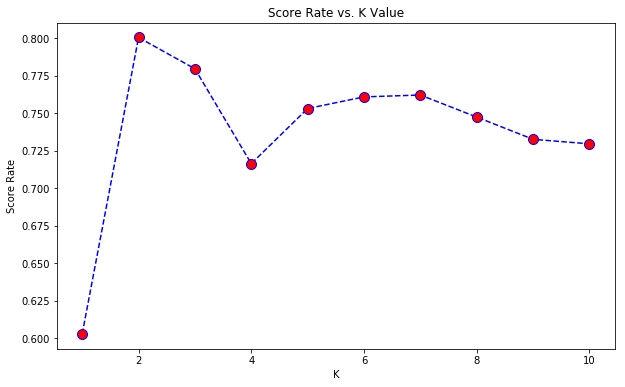

In [86]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),score_val,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Score Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Score Rate')

In [92]:
data.head(2)

,video_id,trending_date,title,channel_title,category_name,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,new_title,clean_joined_title
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,34,"[WANT, TALK, MARRIAGE]",WANT TALK MARRIAGE
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",62,"[Trump, Presidency, Last, Week, Tonight, John,...",Trump Presidency Last Week Tonight John Oliver...


In [141]:
X_train_all,X_test_all,y_train_all,y_test_all=train_test_split(data[['category_id','title_length']],data['views'],test_size=0.2)

In [142]:
LinearR_all=LinearRegression()

In [143]:
LinearR_all.fit(X_train_all,y_train_all)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [144]:
predictions_LR_all=LinearR_all.predict(X_test_all)

In [145]:
LinearR_all.score(X_test_all,y_test_all)

0.03060799691573035

In [122]:
data.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,title_length
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011,0.024199
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256,-0.035612
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641,-0.078166
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853,-0.031235
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725,-0.067043
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970,0.026668
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526,0.001442
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000,-0.013833
title_length,0.024199,-0.035612,-0.078166,-0.031235,-0.067043,0.026668,0.001442,-0.013833,1.000000


In [128]:
data['time_to_trend']=data['trending_date']-data['publish_time']#We find in how many days the video became popular

In [129]:
data

,video_id,trending_date,title,channel_title,category_name,category_id,publish_time,tags,views,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,new_title,clean_joined_title,time_to_trend
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,...,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,34,"[WANT, TALK, MARRIAGE]",WANT TALK MARRIAGE,0 days 06:46:59
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,...,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",62,"[Trump, Presidency, Last, Week, Tonight, John,...",Trump Presidency Last Week Tonight John Oliver...,0 days 16:30:00
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,...,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,53,"[Racist, Superman, Rudy, Mancuso, King, Bach, ...",Racist Superman Rudy Mancuso King Bach Lele Pons,1 days 04:54:36
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,...,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,32,"[Nickelback, Lyrics, Real, Fake]",Nickelback Lyrics Real Fake,0 days 12:59:56
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,...,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,"[Dare, GOING, BALD]",Dare GOING BALD,1 days 05:58:19
5,gHZ1Qz0KiKM,2017-11-14,2 Weeks with iPhone X,iJustine,Science & Technology,28,2017-11-13 19:07:23,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,...,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,21,"[2, Weeks, iPhone, X]",2 Weeks iPhone X,0 days 04:52:37
6,39idVpFF7NQ,2017-11-14,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,Entertainment,24,2017-11-12 05:37:17,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,...,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,41,"[Roy, Moore, Jeff, Sessions, Cold, Open, SNL]",Roy Moore Jeff Sessions Cold Open SNL,1 days 18:22:43
7,nc99ccSXST0,2017-11-14,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,Science & Technology,28,2017-11-12 21:50:37,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,...,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....,35,"[5, Ice, Cream, Gadgets, put, Test]",5 Ice Cream Gadgets put Test,1 days 02:09:23
8,jr9QtXwC9vc,2017-11-14,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,Film & Animation,1,2017-11-13 14:00:23,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,...,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",65,"[Greatest, Showman, Official, Trailer, 2, HD, ...",Greatest Showman Official Trailer 2 HD 20th Ce...,0 days 09:59:37
9,TUmyygCMMGA,2017-11-14,Why the rise of the robots won’t mean the end ...,Vox,News & Politics,25,2017-11-13 13:45:16,"vox.com|""vox""|""explain""|""shift chan

In [133]:
data['time_to_trend'].describe()#Many videos remain popular for 4 days / 50% 4 days 18:59:55

count                       40949
mean      16 days 05:21:53.236220
std      146 days 00:18:47.135218
min             -1 days +10:59:56
25%               2 days 10:00:01
50%               4 days 18:59:55
75%               8 days 02:04:49
max            4214 days 15:35:49
Name: time_to_trend, dtype: object